In [ ]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for viscosity of hydrogen is collected.

In [3]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/physicalproperties/viscosity/hydrogen.csv')
expdata_df

,Fluid,Property,Dataset,#T (K),P(Mpa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,T ( C),T ( R)
0,H2,Viscosity,Yusibani2011,294.52,4.690000,NaN,NaN,NaN,0.000009,NaN,NaN,NaN,21.52,530.136
1,H2,Viscosity,Yusibani2011,294.91,10.160000,NaN,NaN,NaN,0.000009,NaN,NaN,NaN,21.91,530.838
2,H2,Viscosity,Yusibani2011,294.99,34.430000,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,21.99,530.982
3,H2,Viscosity,Yusibani2011,295.01,52.740000,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,22.01,531.018
4,H2,Viscosity,Yusibani2011,295.00,81.650000,NaN,NaN,NaN,0.000011,NaN,NaN,NaN,22.00,531.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,H2,Viscosity,Michels1953,323.15,23.882303,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
77,H2,Viscosity,Michels1953,323.15,29.698358,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
78,H2,Viscosity,Michels1953,323.15,34.855800,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
79,H2,Viscosity,Michels1953,323.15,45.849562,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670


<Figure size 640x480 with 0 Axes>

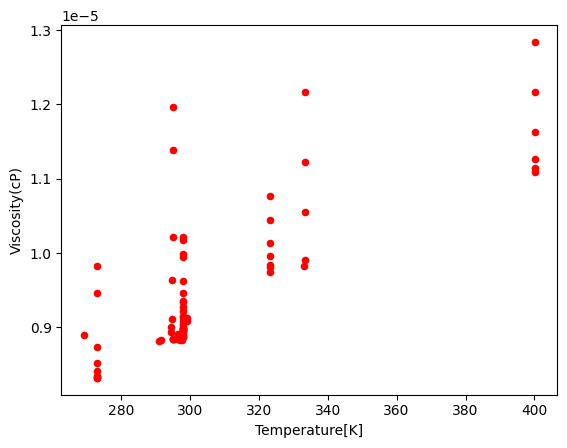

In [4]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='#T (K)', y='Visc(Pa s)', kind='scatter',ylabel='Viscosity(cP)', xlabel='Temperature[K]',color='red')

plt.show()

In [6]:
referenceList = expdata_df['Dataset'].unique().tolist()
temperatureList = expdata_df['#T (K)'].unique().tolist()
pressureList = expdata_df['P(Mpa)'].unique().tolist()
data = expdata_df.groupby(['#T (K)'])['P(Mpa)'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('pressure ', pressureList)
print('numer of data points for each temperature:')
print(data)

references  ['Yusibani2011', 'Gracki1969', 'Chuang1976.', 'Carey1974', 'Michels1953']
temperature  [294.52, 294.91, 294.99, 295.01, 295.0, 295.02, 333.28, 333.32, 333.3, 333.31, 400.11, 400.1, 400.12, 298.15, 273.15, 295.15, 295.29, 295.26, 295.25, 297.16, 291.08, 291.79, 296.73, 297.78, 297.57, 297.47, 297.56, 269.31, 296.53, 294.6, 299.19, 299.15, 298.1, 323.15]
pressure  [4.69, 10.16, 34.43, 52.74, 81.65, 99.33, 4.94, 9.48, 48.48, 69.11, 94.92, 4.83, 9.19, 28.19, 49.79, 71.21, 95.38, 0.61706925, 1.23920475, 2.49563475, 3.77232975, 5.06726325, 6.383475, 7.71995175, 9.07770675, 10.4587665, 11.863131, 14.01426075, 16.2221325, 0.407427825, 1.01345265, 2.02467615, 4.04914965, 8.089889325, 12.12140843, 20.23227203, 40.45633673, 50.4752514, 0.146, 0.4, 0.563, 0.67, 0.924, 1.586, 2.261, 2.499, 3.367, 4.033, 4.273, 4.894, 5.765, 5.857, 6.414, 6.991, 8.998, 11.024, 2.67801975, 3.100545, 3.48659325, 3.69937575, 3.700389, 4.55050575, 5.39555625, 15.2291475, 17.6609475, 20.1535425, 22.61574, 27.

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

In [33]:
data273 = expdata_df.loc[expdata_df['#T (K)'] == 273.15]

<Figure size 640x480 with 0 Axes>

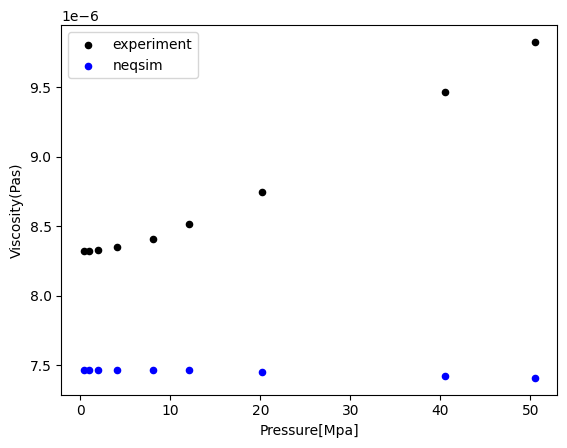

In [34]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('pr')
fluid1.addComponent('hydrogen', 1.0)
fluid1.setTemperature(0.0, 'C')
fluid1.setPressure(100.0, 'bara')

def viscosity(pres):
    #see methods: https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ViscosityOfFluids.ipynb#scrollTo=PzWrasHBWB3X
    #fluid1.getPhase('gas').getPhysicalProperties().setViscosityModel(method)
    fluid1.setPressure(pres, 'MPa')
    try:
        TPflash(fluid1)
        fluid1.initProperties()
        return fluid1.getPhase('gas').getViscosity('cP')/1000.0
    except:
        return float("nan")
pressures = data273['P(Mpa)'].values.tolist()
visc_res = [viscosity(P) for P in pressures]

dataWithExperiment = data273.assign(calc_viscosity = visc_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='P(Mpa)', y='Visc(Pa s)', kind='scatter',ylabel='Viscosity(Pas)', xlabel='Pressure[MPa]',color='black')	
dataWithExperiment.plot(ax=plot1, x='P(Mpa)', y='calc_viscosity', kind='scatter',ylabel='Viscosity(Pas)', xlabel='Pressure[Mpa]',color='blue')	
plt.legend(['experiment', 'neqsim'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting